In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import lightkurve as lk
from lightkurve import search_lightcurve
import numpy as np
from lightkurve import search_targetpixelfile
# tenemos que descargar los datos que necesitamos a traves de esta libreria

# Transitos con TESS y Kepler (si es que esta)

Cuando defina la apertura es necesario tener en cuenta el efecto del background, 

https://lightkurve.github.io/lightkurve/tutorials/2-creating-light-curves/2-1-cutting-out-tpfs.html



In [2]:
# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

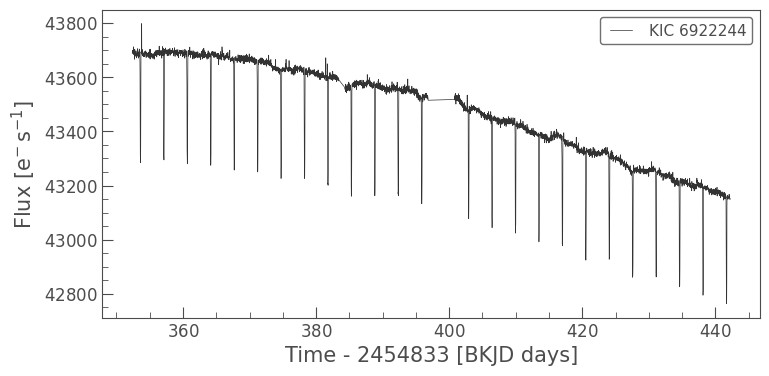

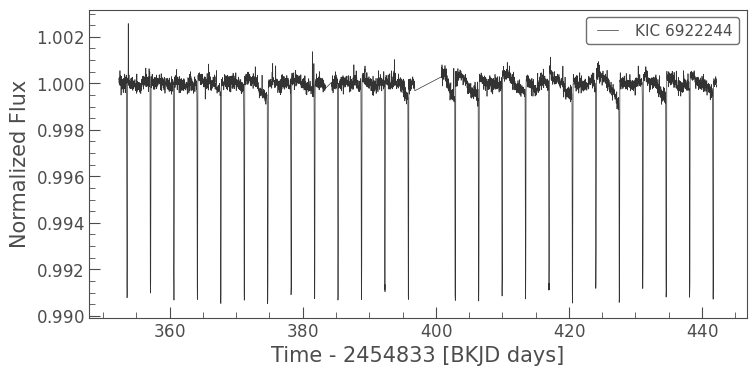

In [3]:
lc.plot();
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

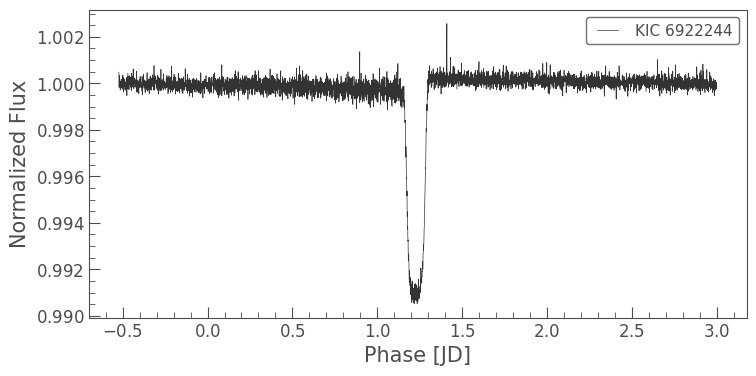

In [4]:
folded_lc = flat_lc.fold(period=3.5225, wrap_phase=3)
folded_lc.plot();

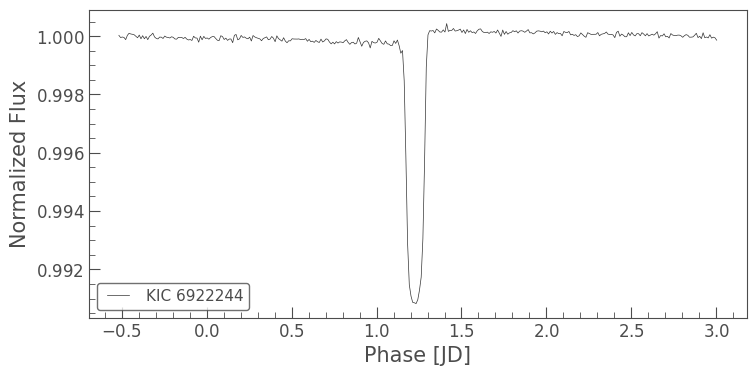

In [5]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

In [6]:
tpf = lk.read("https://archive.stsci.edu/pub/kepler/target_pixel_files/0069/006922244/kplr006922244-2010078095331_lpd-targ.fits.gz")



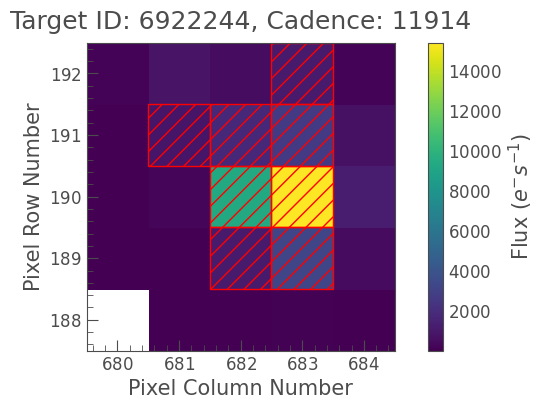

In [7]:
tpf.plot(aperture_mask=tpf.pipeline_mask);




In [8]:
lc = search_lightcurve('KIC 10264202', author="Kepler", quarter=10, cadence="long").download().remove_nans()


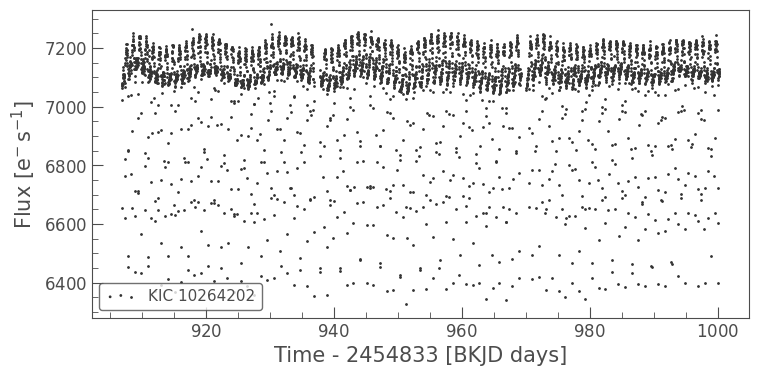

In [9]:
lc.scatter();

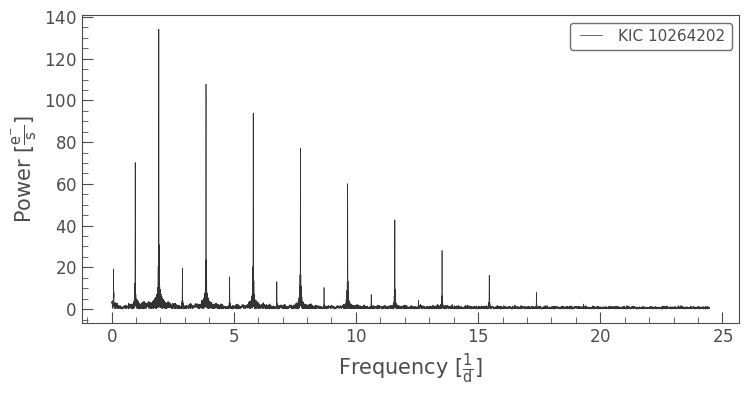

In [10]:
pg = lc.to_periodogram(oversample_factor=10)
pg.plot();

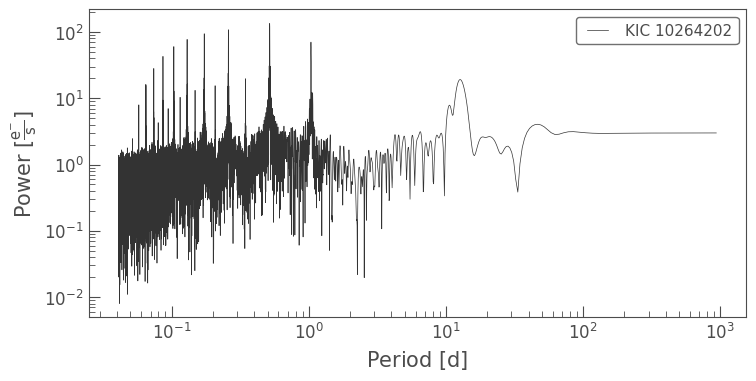

In [11]:
pg.plot(view="period", scale='log');

In [12]:
pg.period

<Quantity [9.34019490e+02, 4.67009745e+02, 3.11339830e+02, ...,
           4.08725490e-02, 4.08707605e-02, 4.08689722e-02] d>

In [13]:
pg.period_at_max_power

<Quantity 0.51746232 d>

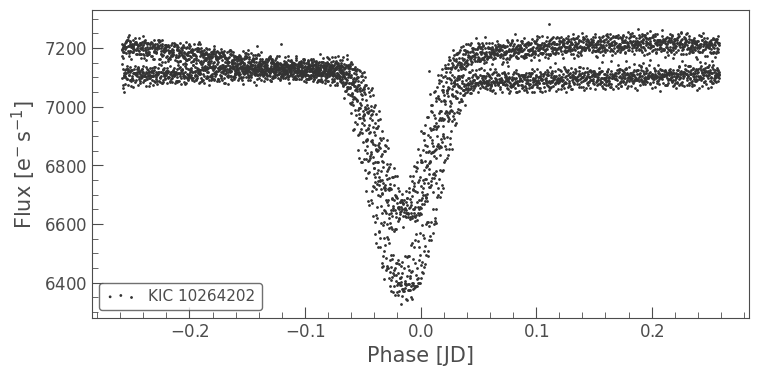

In [14]:
lc.fold(period=pg.period_at_max_power).scatter();


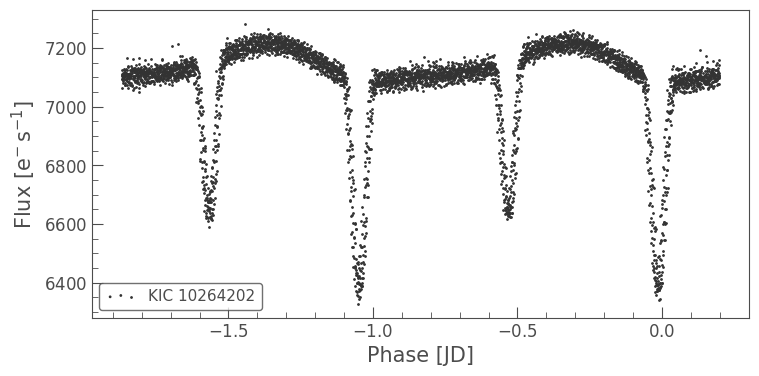

In [15]:
lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();

In [16]:
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.period_at_max_power

<Quantity 1.03509717 d>

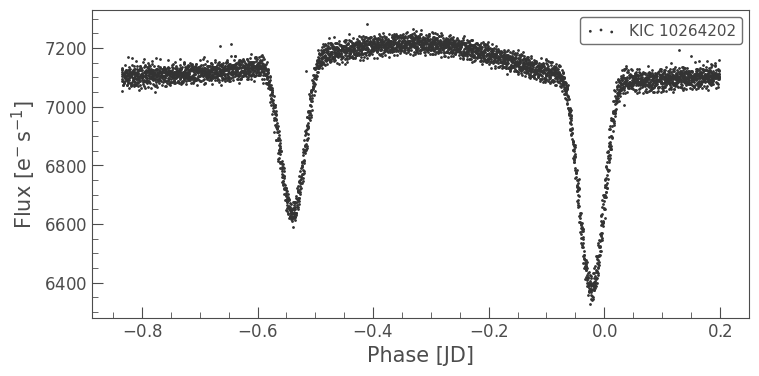

In [17]:
lc.fold(period=pg.period_at_max_power, wrap_phase=0.2).scatter();


## AHORA BUSCAMOS EL TARGET

In [18]:
# me he dado cuenta que no existen lightcurve par nuestro casos, solo tenemos targerpixelfiel
# 
search_result = lk.search_lightcurve('WASP-189', author='TESS')
search_result

No data found for target "WASP-189".


SearchResult containing 0 data products.

In [19]:
import lightkurve as lk

result = lk.search_targetpixelfile("WASP-189")
print(result[0].table["provenance_name"].tolist())
print(result[1].table["provenance_name"].tolist())

#for column in result.table.columns:
#  print(column)

print(result[0].table["mission"].tolist())
print(result[1].table["mission"].tolist())

print(result[0].table["calib_level"].tolist())
print(result[1].table["calib_level"].tolist())


print(result[0].table["t_exptime"].tolist())
print(result[1].table["t_exptime"].tolist())


print(result[0].table["wavelength_region"].tolist())
print(result[1].table["wavelength_region"].tolist())
print(result[0].table[['obs_collection','author','calib_level','t_exptime','t_min','t_max']])


['SPOC']
['TESS-SPOC']
['TESS Sector 51']
['TESS Sector 51']
[3]
[4]
[120.0]
[600.0]
['Optical']
['Optical']
obs_collection author calib_level t_exptime       t_min            t_max      
-------------- ------ ----------- --------- ----------------- ----------------
          TESS   SPOC           3     120.0 59692.45752238426 59717.0394621875


### Busqueda de targetpixelfile


In [13]:
search_result = lk.search_targetpixelfile('wasp-189')
search_result

SearchResult containing 2 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 51 2022      SPOC     120   157910432      0.0
  1 TESS Sector 51 2022 TESS-SPOC     600   157910432      0.0

In [14]:
tpf = search_result.download()


c:\Users\Maxlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [5]:
tpf.animate()

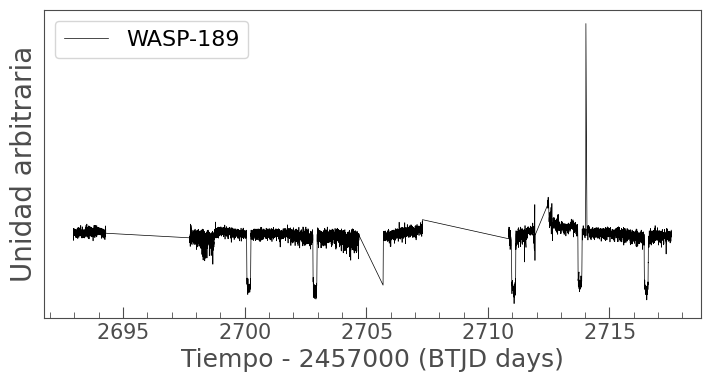

In [95]:
lc = tpf.to_lightcurve()
lc.plot(label="WASP-189", c="black")


plt.ylabel(r"Unidad arbitraria", fontsize=20)
plt.xlabel("Tiempo - 2457000 (BTJD days)", fontsize=18)
plt.yticks([],fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=16)
plt.savefig("Imagenes/lc_wasp189.png", bbox_inches='tight')



In [24]:
tpf_collection = search_result.download_all()
tpf_collection

TargetPixelFileCollection of 2 objects:
    0: TessTargetPixelFile(TICID: 157910432)
    1: TessTargetPixelFile(TICID: 157910432)

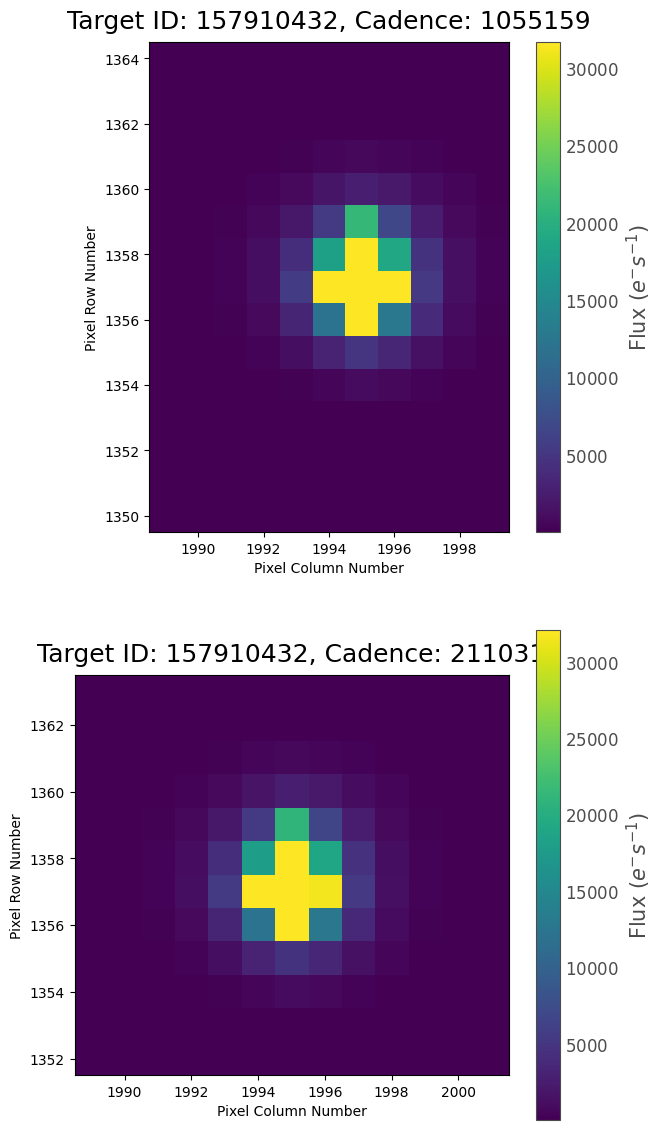

In [25]:
tpf_collection.plot();

obs_collection   author  calib_level ...       t_min            t_max      
-------------- --------- ----------- ... ----------------- ----------------
          TESS      SPOC           3 ... 59692.45752238426 59717.0394621875
          HLSP TESS-SPOC           4 ...  59692.4561334838 59717.0394621875


<Axes: title={'center': 'Target ID: 157910432, Cadence: 1055159'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

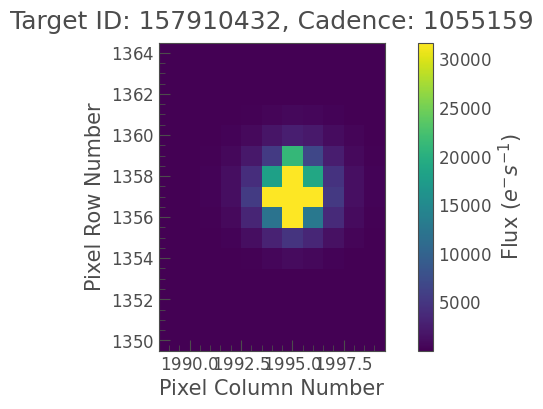

In [17]:
import lightkurve as lk
import numpy as np

search = lk.search_targetpixelfile("WASP-189")
tbl = search.table
print(tbl[['obs_collection','author','calib_level','t_exptime','t_min','t_max']])

# elegir la entrada con menor t_exptime (mejor resolución temporal)
idx = np.argmin(tbl['t_exptime'])
tpf = search[0].download()
tpf.plot()


In [18]:
# fotometría por umbral (threshold)
lc_thresh = tpf.to_lightcurve(aperture_mask='threshold').remove_nans()

# fotometría con la máscara pipeline (si existe)
lc_pipe = tpf.to_lightcurve(aperture_mask='pipeline').remove_nans()

# fotometría custom (ejemplo)
import numpy as np
mask = tpf.create_threshold_mask(80)   # 80 para el primer objetivo. 25 segundo.
lc_custom = tpf.to_lightcurve(aperture_mask=mask).remove_nans()

# comparar ruido RMS y número de puntos
for name, lc in [('threshold', lc_thresh), ('pipeline', lc_pipe), ('custom', lc_custom)]:
    print(name, "N =", len(lc.time), "RMS flux = ", np.std(lc.flux))



threshold N = 10941 RMS flux =  635.1181030273438 electron / s
pipeline N = 10941 RMS flux =  547.6679077148438 electron / s
custom N = 10941 RMS flux =  506.14691162109375 electron / s


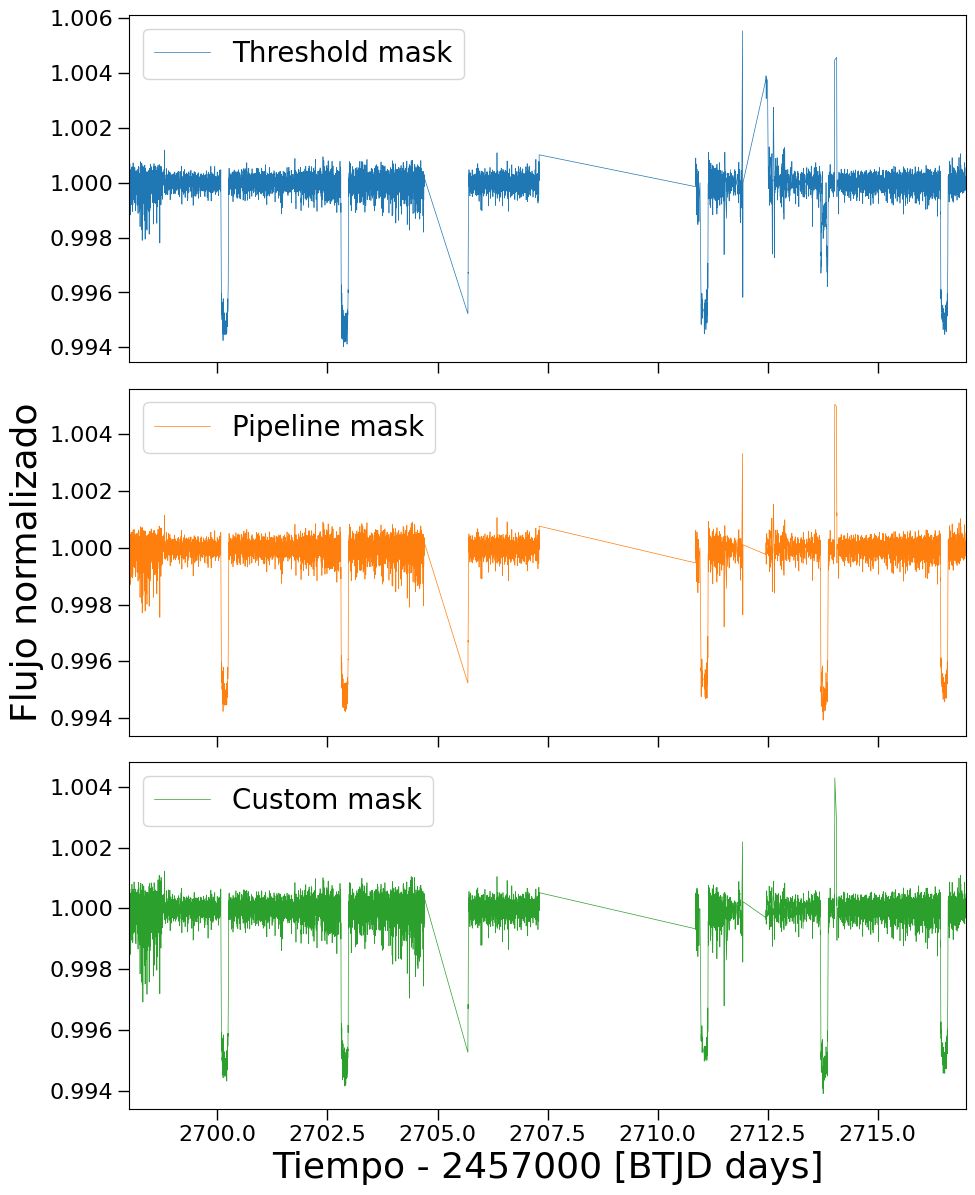

In [81]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

lc_thresh.remove_outliers().normalize().flatten().plot(ax=axs[0], color="tab:blue", label= "Threshold mask")


lc_pipe.remove_outliers().normalize().flatten().plot(ax=axs[1], color="tab:orange", label = "Pipeline mask")

lc_custom.remove_outliers().normalize().flatten().plot(ax=axs[2], color="tab:green", label = "Custom mask")

axs[0].set_ylabel("",fontsize=20)
axs[1].set_ylabel("Flujo normalizado",fontsize=26)
axs[2].set_ylabel("",fontsize=20)

axs[0].set_xlabel("",fontsize=20)
axs[1].set_xlabel("",fontsize=18)
axs[2].set_xlabel("Tiempo (BTJD)",fontsize=30)

#axs[0].set_yticks([1.0,1.002])
#axs[1].set_yticks([1.0,1.002])
#axs[2].set_yticks([1.0, 1.002]) 

for ax in axs:
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', labelsize=12)  

axs[0].set_xlim(2698, 2717)
axs[1].set_xlim(2698, 2717)
axs[2].set_xlim(2698, 2717)

axs[0].tick_params(
    axis='both',      # 'x', 'y' o 'both'
    which='major',    # 'major' o 'minor'
    length=8,         # largo de la marca
    width=1,          # grosor
    labelsize=16   # tamaño del número del tick
)
axs[1].tick_params(
    axis='both',      # 'x', 'y' o 'both'
    which='major',    # 'major' o 'minor'
    length=8,         # largo de la marca
    width=1,          # grosor
    labelsize=16    # tamaño del número del tick
)
axs[2].tick_params(
    axis='both',      # 'x', 'y' o 'both'
    which='major',    # 'major' o 'minor'
    length=8,         # largo de la marca
    width=1,          # grosor
    labelsize=16     # tamaño del número del tick
)
plt.xlabel("Tiempo - 2457000 [BTJD days]", fontsize=26)
plt.subplots_adjust(hspace=0) 

axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
axs[2].legend(fontsize=20)
plt.tight_layout()
plt.savefig("Imagenes/Comp lightcurve metodos")




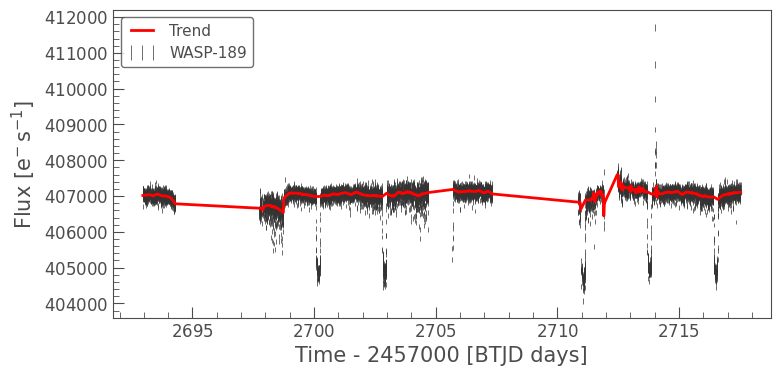

In [ ]:

flat, trend = lc_custom.flatten(window_length=301, return_trend=True)

ax = lc_custom.errorbar(label="WASP-189")               
trend.plot(ax=ax, color='red', lw=2, label='Trend');  
plt.show()

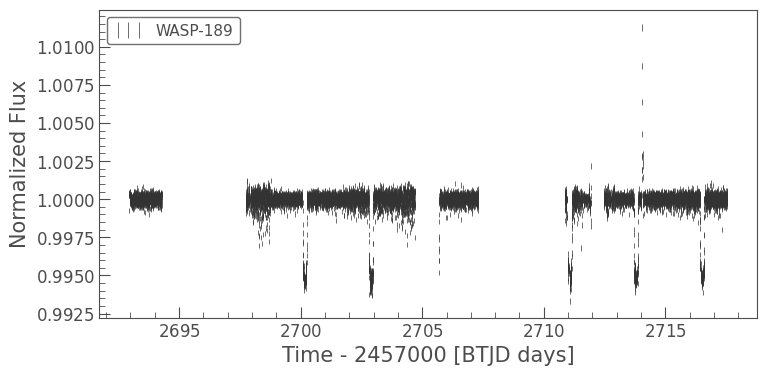

In [57]:

flat.errorbar(label="WASP-189")
plt.show()

In [ ]:
flat.to_fits(path='WASP189_lightcurve3.fits', overwrite=True)

In [59]:
import astropy.io.fits as fits

tab = fits.open('WASP189_lightcurve3.fits')[1].data
tab

FITS_rec([(2692.95901747, 1.0004505, 0.00016711, 1055159, 1995.02947894, 1357.25738557, 0),
          (2692.96040637, 1.0002154, 0.00016709, 1055160, 1995.0287201 , 1357.25242173, 0),
          (2692.96179528, 1.0003405, 0.00016711, 1055161, 1995.02986727, 1357.25557639, 0),
          ...,
          (2717.53679089, 1.0000002, 0.0001666 , 1072855, 1995.06869515, 1357.12591687, 0),
          (2717.53817975, 1.0000669, 0.0001666 , 1072856, 1995.0735363 , 1357.12872469, 0),
          (2717.53956862, 1.0005453, 0.00016664, 1072857, 1995.07081292, 1357.12522483, 0)],
         dtype=(numpy.record, [('TIME', '>f8'), ('FLUX', '>f4'), ('FLUX_ERR', '>f4'), ('CADENCENO', '>i4'), ('MOM_CENTR1', '>f8'), ('MOM_CENTR2', '>f8'), ('QUALITY', '>i4')]))

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

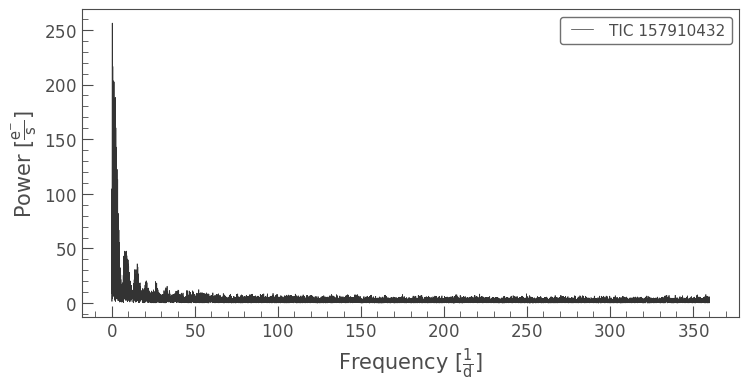

In [57]:
lc_periodogram = lc_custom.to_periodogram(oversample_factor=10)

lc_periodogram.plot()

<Figure size 1000x600 with 0 Axes>

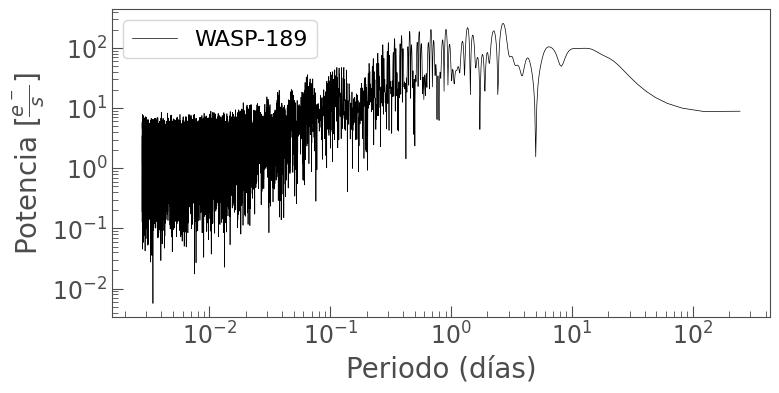

In [ ]:

lc_periodogram.plot(view="period", scale='log', label="WASP-189", c="black");

plt.yticks(fontsize=17)
plt.xticks(fontsize=17)
plt.xlabel("Periodo (días)", fontsize=20)
plt.ylabel(r"Potencia [$\frac{e^-}{s}$]", fontsize=20)
plt.legend(fontsize=16)
plt.savefig("Imagenes/Periodograma_wasp189.png", bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
lc_periodogram.period

<Quantity [2.45763845e+02, 1.22881923e+02, 8.19212817e+01, ...,
           1.38912415e-02, 1.38904564e-02, 1.38896714e-02] d>

In [65]:
lc_periodogram.period_at_max_power

<Quantity 2.70115947 d>

(0.992, 1.003)

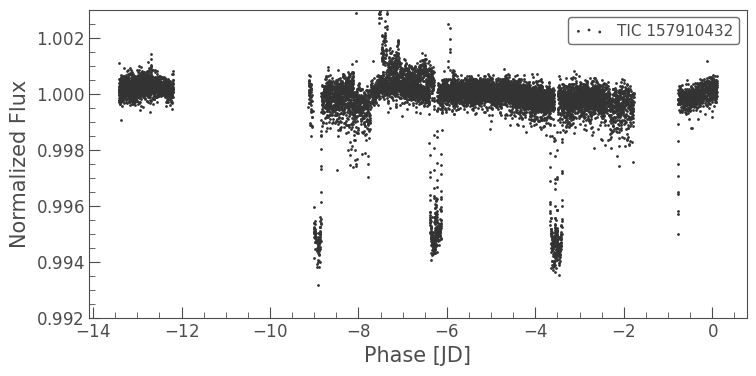

In [85]:
lc_pipe.fold(period=5*pg.period_at_max_power, wrap_phase=0.1).normalize().scatter();
plt.ylim(0.992,1.003)

In [78]:
import astropy.units as u
pg = lc_pipe.to_periodogram(minimum_period=0.2*u.day, maximum_period=3*u.day, oversample_factor=1000)
pg.period_at_max_power

<Quantity 2.70338246 d>

(0.992, 1.003)

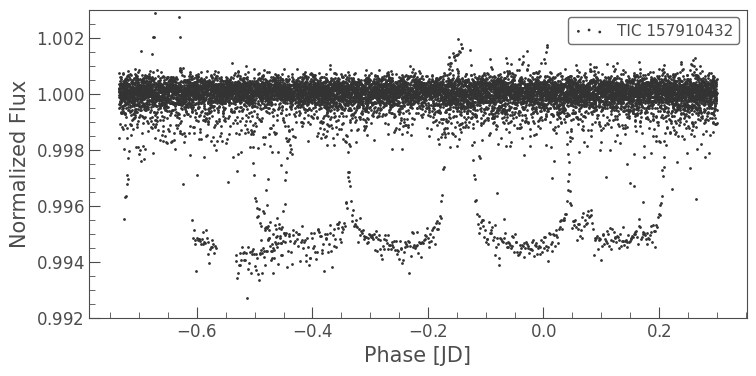

In [76]:
lc_custom.fold(period=1*pg.period_at_max_power, wrap_phase=0.3).normalize().scatter();
plt.ylim(0.992,1.003) 

### Searching for TESS Full Frame Image (FFI) Cutouts
no olvidar citar
https://lightkurve.github.io/lightkurve/tutorials/1-getting-started/searching-for-data-products.html

In [12]:


search_result = lk.search_tesscut('wasp-189')
search_result.table

<Table length=1>
        description            mission     target_name ...  year sort_order
                                                       ...                 
           str27                str14          str8    ... int32   int32   
--------------------------- -------------- ----------- ... ----- ----------
TESS FFI Cutout (sector 51) TESS Sector 51    wasp-189 ...  2022          9

In [ ]:
tpf_cutout = search_result[0].download(cutout_size=10) # cutout_size el tamaño n x n al rededor del ccd que quiero descargar


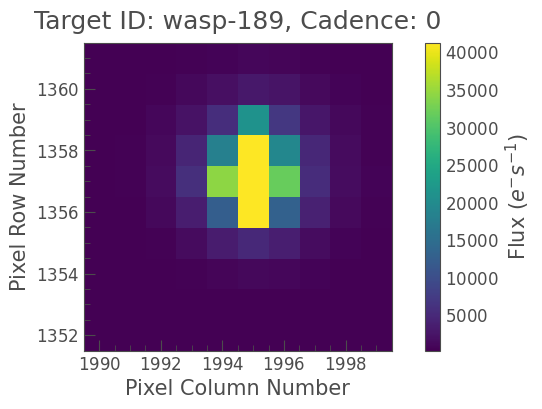

In [ ]:
tpf_cutout.plot();
tpf_cutout.animate()

## Esta parte la hice para analizar los ccf que ya trae los archivos por defecto, no lo ocupe finalmente.


In [ ]:
from pathlib import Path
import tarfile, shutil

archive_dir = Path("archive")
dest_dir = archive_dir / "extracted_s1d"
dest_dir.mkdir(parents=True, exist_ok=True)

def make_safe_name(member_name: str) -> str:
    """Elimina subcarpetas y reemplaza ':' por '-'."""
    base = Path(member_name).name
    return base.replace(":", "-")
    
count = 0
for tar_path in archive_dir.glob("*.tar"):
    print(f"⏳ Abriendo: {tar_path}")
    with tarfile.open(tar_path, "r") as tf:
        for m in tf.getmembers():
            if not m.isfile():
                continue
            if not m.name.endswith("_s1d_A.fits"):
                continue

            safe_name = make_safe_name(m.name)
            out_path = dest_dir / safe_name

            # Extraer leyendo directamente desde el .tar
            with tf.extractfile(m) as src, open(out_path, "wb") as dst:
                shutil.copyfileobj(src, dst)

            count += 1
            print(f"  ✅ Extraído: {out_path}")

print(f"\n🎉 ¡Listo! {count} archivos *_s1d_A.fits extraídos en {dest_dir}")


⏳ Abriendo: archive\ADP.2018-03-28T01_03_35.907.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T03-58-00.286_s1d_A.fits
⏳ Abriendo: archive\ADP.2018-03-28T01_03_35.921.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T04-08-31.442_s1d_A.fits
⏳ Abriendo: archive\ADP.2018-03-28T01_03_35.929.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T04-19-02.229_s1d_A.fits
⏳ Abriendo: archive\ADP.2018-03-28T01_03_35.943.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T04-29-33.285_s1d_A.fits
⏳ Abriendo: archive\ADP.2018-03-28T01_03_35.951.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T04-40-04.240_s1d_A.fits
⏳ Abriendo: archive\ADP.2018-03-28T01_03_36.001.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T03-36-58.139_s1d_A.fits
⏳ Abriendo: archive\ADP.2018-03-28T01_03_36.003.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.2018-03-27T03-47-29.250_s1d_A.fits
⏳ Abriendo: archive\ADP.2019-04-16T01_15_17.981.tar
  ✅ Extraído: archive\extracted_s1d\HARPS.201